In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.dates as mdates
import datetime
import holidays
import folium

In [2]:
from plotly import __version__
import cufflinks as cf

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
%matplotlib inline

# Load data sets

In [5]:
# Import hourly pickups by Chicago Side
df_sides = pd.read_csv("hour_pickups_sides_final.csv")
df_sides["StartTime"] = pd.to_datetime(df_sides["StartTime"], 
                                       format="%d/%m/%Y %H:%M")
# set index
df_sides.set_index("StartTime", inplace=True)

In [6]:
df_sides.head(2)

,FNS,Ohara,NWS,NS,WS,CEN,SS,SWS,FSWS,FSES,is_holiday,is_weekend,season,Total
StartTime,,,,,,,,,,,,,,
2018-11-01 00:00:00,70,15,20,174,134,141,48,25,17,12,0,0,2,656
2018-11-01 01:00:00,46,5,9,200,94,103,22,16,17,7,0,0,2,519


Chicago Transit Authority (CTA) station turnstile data can help to guestimate train frequency. There are two types of subway entrances that have different demand patterns

- Residential neighborhoods
- Commercial neighborhoods

Step1: count trains in each neighborhood.

Step2: simulate CTA train frequency based on turnstile entry data
- multiple business demand with number of stations_frequency of step
- you get a dataframewith simulated CTA train frequency by neighborhood.
Step3: add transit data to Chicago Side
Step4: go trhough each neighborhood with CTA data.

for i in neighborhood.keys():

    predictions = LSTMpredict()
    rmse = rmse(predictions, y_test)

In [7]:
df_cta = pd.read_csv("cta daily ridership by station nov2018-2019.csv")
df_cta["date"] = pd.to_datetime(df_cta["date"], format="%d/%m/%Y")
df_cta.set_index("date", inplace=True)
df_cta = df_cta[["stationname", "rides"]]
# df_cta.sort_index()

In [12]:
df_cta

,stationname,rides
date,,
2018-11-01,Austin-Forest Park,2248.0
2018-11-02,Austin-Forest Park,1983.0
2018-11-03,Austin-Forest Park,837.0
2018-11-04,Austin-Forest Park,604.0
2018-11-05,Austin-Forest Park,2161.0
...,...,...
2019-12-27,Washington/Wabash,7871.0
2019-12-28,Washington/Wabash,4474.0
2019-12-29,Washington/Wabash,3750.0


In [8]:
cta_ridership_dic = {}

for i in df_cta.stationname.unique():
    rides = df_cta["rides"][df_cta["stationname"] == i]
    cta_ridership_dic[i] = rides

In [9]:
cta_ridership_dic.keys()

dict_keys(['Austin-Forest Park', 'Harlem-Lake', 'Pulaski-Lake', 'Quincy/Wells', 'Davis', "Belmont-O'Hare", 'Jackson/Dearborn', 'Sheridan', 'Damen-Brown', 'Morse', '35th/Archer', '51st', 'Dempster-Skokie', 'Pulaski-Cermak', 'LaSalle/Van Buren', 'Ashland-Lake', 'Oak Park-Forest Park', 'Sox-35th-Dan Ryan', 'Randolph/Wabash', 'Damen-Cermak', 'Western-Forest Park', 'Cumberland', '79th', 'Kedzie-Homan-Forest Park', 'State/Lake', 'Main', 'Central-Lake', 'Ashland/63rd', 'Indiana', 'Western-Orange', 'Division/Milwaukee', 'Grand/State', 'Berwyn', 'UIC-Halsted', 'Southport', 'Washington/Dearborn', 'Clark/Lake', 'Forest Park', 'Noyes', 'Cicero-Cermak', 'Clinton-Forest Park', 'California-Cermak', '95th/Dan Ryan', 'Merchandise Mart', 'Racine', 'Cicero-Lake', 'Grand/Milwaukee', 'Garfield-South Elevated', 'Foster', 'Diversey', 'Wilson', "Irving Park-O'Hare", 'Jackson/State', 'California/Milwaukee', '54th/Cermak', 'Damen/Milwaukee', 'Kostner', 'Ridgeland', 'Clark/Division', 'North/Clybourn', 'Armitage'

In [13]:
daily_cta_rides = pd.DataFrame(cta_ridership_dic)
# daily_cta_rides.to_csv("daily_cta_rides.csv")
daily_cta_rides.head(2)

,Austin-Forest Park,Harlem-Lake,Pulaski-Lake,Quincy/Wells,Davis,Belmont-O'Hare,Jackson/Dearborn,Sheridan,Damen-Brown,Morse,...,Irving Park-Brown,Western-Brown,Harrison,Montrose-Brown,Morgan-Lake,Lake/State,Conservatory,Oakton-Skokie,Cermak-McCormick Place,Washington/Wabash
date,,,,,,,,,,,,,,,,,,,,,
2018-11-01,2248.0,4021.0,1575.0,8530.0,3734.0,5110.0,8130.0,5480.0,3138.0,4813.0,...,3656.0,4287.0,4806.0,2857.0,3737.0,22982.0,974.0,1140.0,1809.0,10805.0
2018-11-02,1983.0,3850.0,1442.0,7627.0,3971.0,4945.0,7110.0,5281.0,2822.0,4688.0,...,3243.0,4074.0,4041.0,2723.0,3706.0,22354.0,933.0,1002.0,2301.0,10869.0


2 types of areas: business and residential.
2 types of days: business days and weekends.
Total 4 types of demand patterns:
- business @ business days
- business @ weekends
- residential @ business days
- residential @ weekends

Following subway ridership patterns derived from Chen et al. (2009), business areas have 2 daily commute ridership peaks. Residential areas have later afternoon commute peak.

Chen, C., Chen. J. & Barry, J. (2009). Diurnal pattern of transit ridership: a case study of the New York City
subway system. Journal of Transport Geography. [online].

In [14]:
business_business_days = {0:0.017, 1:0.017, 2:0.008, 3:0.008, 4:0.004, 
                          5:0.004, 6:0.008, 7:0.021, 8:0.051, 9:0.042,
                          10:0.042, 11:0.038, 12:0.034, 13:0.038, 14:0.051, 
                          15:0.068, 16:0.084, 17:0.11, 18:0.101, 19:0.084,
                          20:0.059, 21:0.051, 22:0.034, 23:0.025}

business_weekend_days = {0:0.015, 1:0.015, 2:0.008, 3:0.008, 4:0.008, 5:0.008, 
                         6:0.015, 7:0.023, 8:0.038, 9:0.046, 10:0.054, 
                         11:0.077, 12:0.092, 13:0.092, 14:0.092, 15:0.092,
                         16:0.062, 17:0.054, 18:0.054, 19:0.054, 20:0.031, 
                         21:0.031, 22:0.015, 23:0.015}

residential_business_days = {0:0.011, 1:0.011, 2:0.005, 3:0.005, 4:0.005,
                                5:0.005, 6:0.22, 7:0.054, 8:0.098, 9:0.098,
                                10:0.087, 11:0.065, 12:0.043, 13:0.033, 14:0.033,
                                15:0.033, 16:0.065, 17:0.098, 18:0.087, 
                                19:0.054, 20:0.033, 21:0.022, 22:0.022, 23:0.011}

residential_weekend_days = {0:0.014, 1:0.007, 2:0.007, 3:0.007, 4:0.007,
                            5:0.007, 6:0.014, 7:0.02, 8:0.027, 9:0.034,
                            10:0.041, 11:0.068, 12:0.082, 13:0.054, 14:0.041,
                            15:0.054, 16:0.082, 17:0.109, 18:0.102, 
                            19:0.082, 20:0.054, 21:0.041, 22:0.027, 23:0.02}


Business district stations: Downtown inset
- Clinton-Lake, Clark/Lake, State/Lake, Washington/Wabash, Adams/Wabash, Library, LaSalle/Van Buren, Laselle, Quincy/Wells, Washington/Wells, Jackson/State, Jackson/Dearborn, Monroe/Dearborn, Monroe/State, Washington/Wells, Washington/Dearborn, State/Lake, Grand/State

# Business district stations: Create hourly values 

business @ business days

In [15]:
daily_cta_rides_business = pd.read_csv("daily_cta_rides_businessstations.csv")
daily_cta_rides_business["date"] = pd.to_datetime(daily_cta_rides_business["date"], format="%d/%m/%Y")

In [16]:
daily_cta_rides_business["day_of_week"] = pd.DatetimeIndex(daily_cta_rides_business["date"]).dayofweek
daily_cta_rides_business.set_index("date", inplace=True)
weekend = daily_cta_rides_business["day_of_week"] > 4
normal = daily_cta_rides_business["day_of_week"] < 5

In [17]:
daily_cta_rides_business.head(2)

,Clinton-Lake,Clark/Lake,State/Lake,Washington/Wabash,Adams/Wabash,Library,LaSalle/Van Buren,LaSalle,Quincy/Wells,Washington/Wells,Jackson/Dearborn,Jackson/State,Monroe/Dearborn,Monroe/State,Washington/Dearborn,Lake/State,Grand/State,day_of_week
date,,,,,,,,,,,,,,,,,,
2018-11-01,4821,22774,13711,10805,8504,4194,3258,3488,8530,8903,8130,11336,8755,11051,14335,22982,11189,3
2018-11-02,4512,21978,12562,10869,7407,3223,2886,3095,7627,8062,7110,8328,8470,10683,14299,22354,12147,4


In [18]:
daily_cta_rides_business_normal = daily_cta_rides_business[normal]
daily_cta_rides_business_normal = daily_cta_rides_business_normal.iloc[:,:-1]

In [19]:
daily_cta_rides_business_normal.head(2)

,Clinton-Lake,Clark/Lake,State/Lake,Washington/Wabash,Adams/Wabash,Library,LaSalle/Van Buren,LaSalle,Quincy/Wells,Washington/Wells,Jackson/Dearborn,Jackson/State,Monroe/Dearborn,Monroe/State,Washington/Dearborn,Lake/State,Grand/State
date,,,,,,,,,,,,,,,,,
2018-11-01,4821,22774,13711,10805,8504,4194,3258,3488,8530,8903,8130,11336,8755,11051,14335,22982,11189
2018-11-02,4512,21978,12562,10869,7407,3223,2886,3095,7627,8062,7110,8328,8470,10683,14299,22354,12147


In [20]:
bdist_bday_dist = [business_business_days[key] for key in business_business_days]
datetime_bb_index = pd.to_datetime([datetime.datetime(i.year, i.month, i.day, key) for i in daily_cta_rides_business_normal.index for key in business_business_days])

In [21]:
daily_cta_rides_business_normal_dic = {}

for station in daily_cta_rides_business_normal.columns:
    hourly_transit = np.outer(daily_cta_rides_business_normal[station], bdist_bday_dist).ravel()
    daily_cta_rides_business_normal_dic[station] = hourly_transit

df_hourly_cta_rides_business_normal = pd.DataFrame(daily_cta_rides_business_normal_dic, index=datetime_bb_index)


In [23]:
df_hourly_cta_rides_business_normal.head(5)

,Clinton-Lake,Clark/Lake,State/Lake,Washington/Wabash,Adams/Wabash,Library,LaSalle/Van Buren,LaSalle,Quincy/Wells,Washington/Wells,Jackson/Dearborn,Jackson/State,Monroe/Dearborn,Monroe/State,Washington/Dearborn,Lake/State,Grand/State
2018-11-01 00:00:00,81.957,387.158,233.087,183.685,144.568,71.298,55.386,59.296,145.01,151.351,138.21,192.712,148.835,187.867,243.695,390.694,190.213
2018-11-01 01:00:00,81.957,387.158,233.087,183.685,144.568,71.298,55.386,59.296,145.01,151.351,138.21,192.712,148.835,187.867,243.695,390.694,190.213
2018-11-01 02:00:00,38.568,182.192,109.688,86.440,68.032,33.552,26.064,27.904,68.24,71.224,65.04,90.688,70.040,88.408,114.680,183.856,89.512
2018-11-01 03:00:00,38.568,182.192,109.688,86.440,68.032,33.552,26.064,27.904,68.24,71.224,65.04,90.688,70.040,88.408,114.680,183.856,89.512
2018-11-01 04:00:00,19.284,91.096,54.844,43.220,34.016,16.776,13.032,13.952,34.12,35.612,32.52,45.344,35.020,44.204,57.340,91.928,44.756


business @ weekend days

In [24]:
daily_cta_rides_business_weekend = daily_cta_rides_business[weekend]
daily_cta_rides_business_weekend = daily_cta_rides_business_weekend.iloc[:,:-1]

In [25]:
daily_cta_rides_business_weekend.head(2)

,Clinton-Lake,Clark/Lake,State/Lake,Washington/Wabash,Adams/Wabash,Library,LaSalle/Van Buren,LaSalle,Quincy/Wells,Washington/Wells,Jackson/Dearborn,Jackson/State,Monroe/Dearborn,Monroe/State,Washington/Dearborn,Lake/State,Grand/State
date,,,,,,,,,,,,,,,,,
2018-11-03,1403,7258,8905,7237,5156,1901,539,1267,1573,1390,3046,2651,2254,2697,5271,9845,7073
2018-11-04,886,5795,6356,5540,4858,1331,389,1130,1330,931,2640,1948,2351,2408,3697,6175,4280


In [26]:
bdist_weekenday_dist = [business_weekend_days[key] for key in business_weekend_days]
datetime_bw_index = pd.to_datetime([datetime.datetime(i.year, i.month, i.day, key) for i in daily_cta_rides_business_weekend.index for key in business_weekend_days])

In [27]:
daily_cta_rides_business_weekend_dic = {}

for station in daily_cta_rides_business_weekend.columns:
    hourly_transit = np.outer(daily_cta_rides_business_weekend[station], bdist_weekenday_dist).ravel()
    daily_cta_rides_business_weekend_dic[station] = hourly_transit

df_hourly_cta_rides_business_weekend = pd.DataFrame(daily_cta_rides_business_weekend_dic, index=datetime_bw_index)

In [28]:
df_hourly_cta_rides_business_weekend.head(2)

,Clinton-Lake,Clark/Lake,State/Lake,Washington/Wabash,Adams/Wabash,Library,LaSalle/Van Buren,LaSalle,Quincy/Wells,Washington/Wells,Jackson/Dearborn,Jackson/State,Monroe/Dearborn,Monroe/State,Washington/Dearborn,Lake/State,Grand/State
2018-11-03 00:00:00,21.045,108.87,133.575,108.555,77.34,28.515,8.085,19.005,23.595,20.85,45.69,39.765,33.81,40.455,79.065,147.675,106.095
2018-11-03 01:00:00,21.045,108.87,133.575,108.555,77.34,28.515,8.085,19.005,23.595,20.85,45.69,39.765,33.81,40.455,79.065,147.675,106.095


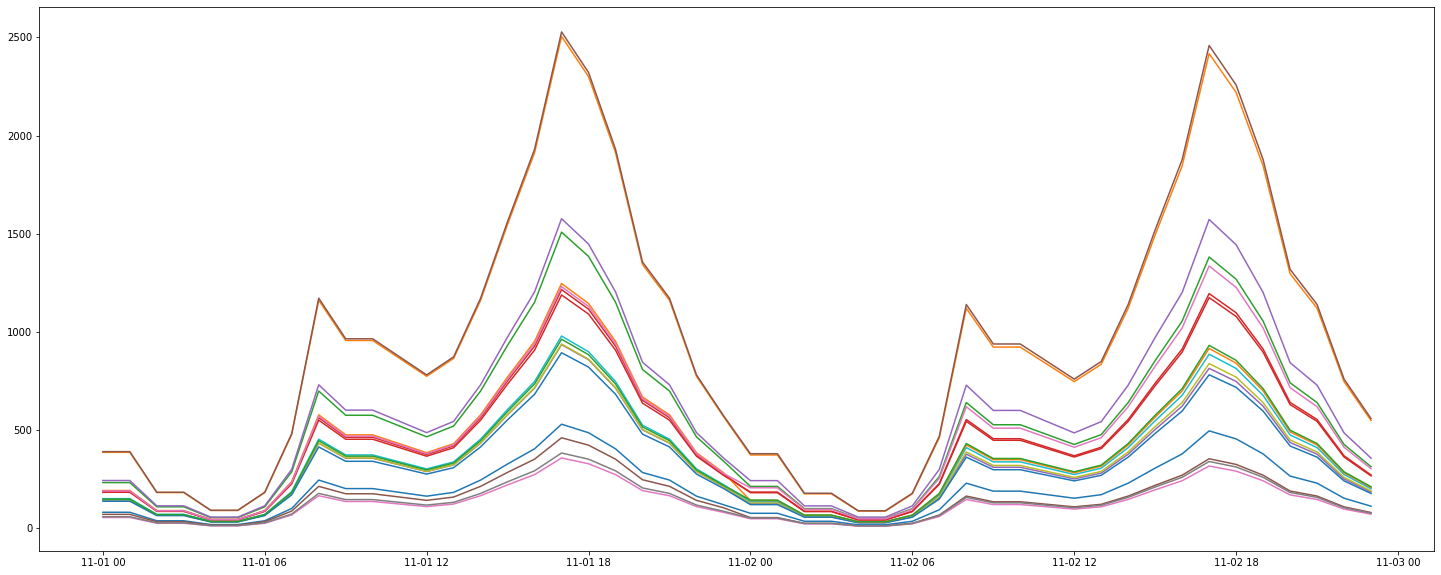

In [29]:
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(df_hourly_cta_rides_business_normal.iloc[:48])

# Residential stations: Create hourly values 

residential @ business days

In [30]:
daily_cta_rides_residential = pd.read_csv("daily_cta_rides_residential.csv")
daily_cta_rides_residential["date"] = pd.to_datetime(daily_cta_rides_residential["date"], format="%d/%m/%Y")

In [31]:
daily_cta_rides_residential["day_of_week"] = pd.DatetimeIndex(daily_cta_rides_residential["date"]).dayofweek
daily_cta_rides_residential.set_index("date", inplace=True)
weekend = daily_cta_rides_residential["day_of_week"] > 4
normal = daily_cta_rides_residential["day_of_week"] < 5

In [32]:
daily_cta_rides_residential.head(2)

,Austin-Forest Park,Harlem-Lake,Pulaski-Lake,Davis,Belmont-O'Hare,Sheridan,Damen-Brown,Morse,35th/Archer,51st,...,Chicago/State,Irving Park-Brown,Western-Brown,Harrison,Montrose-Brown,Morgan-Lake,Conservatory,Oakton-Skokie,Cermak-McCormick Place,day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2018-11-01,2248,4021,1575,3734,5110,5480,3138,4813,3431,1880,...,15046,3656,4287,4806,2857,3737,974,1140,1809,3
2018-11-02,1983,3850,1442,3971,4945,5281,2822,4688,3059,1792,...,15844,3243,4074,4041,2723,3706,933,1002,2301,4


In [33]:
daily_cta_rides_residential_normal = daily_cta_rides_residential[normal]
daily_cta_rides_residential_normal = daily_cta_rides_residential_normal.iloc[:,:-1]

In [34]:
daily_cta_rides_residential_normal.head(2)

,Austin-Forest Park,Harlem-Lake,Pulaski-Lake,Davis,Belmont-O'Hare,Sheridan,Damen-Brown,Morse,35th/Archer,51st,...,Addison-Brown,Chicago/State,Irving Park-Brown,Western-Brown,Harrison,Montrose-Brown,Morgan-Lake,Conservatory,Oakton-Skokie,Cermak-McCormick Place
date,,,,,,,,,,,,,,,,,,,,,
2018-11-01,2248,4021,1575,3734,5110,5480,3138,4813,3431,1880,...,2834,15046,3656,4287,4806,2857,3737,974,1140,1809
2018-11-02,1983,3850,1442,3971,4945,5281,2822,4688,3059,1792,...,2310,15844,3243,4074,4041,2723,3706,933,1002,2301


In [35]:
rdist_bday_dist = [residential_business_days[key] for key in residential_business_days]
datetime_rb_index = pd.to_datetime([datetime.datetime(i.year, i.month, i.day, key) for i in daily_cta_rides_residential_normal.index for key in residential_business_days])


In [36]:
daily_cta_rides_residential_normal_dic = {}

for station in daily_cta_rides_residential_normal.columns:
    hourly_transit = np.outer(daily_cta_rides_residential_normal[station], rdist_bday_dist).ravel()
    daily_cta_rides_residential_normal_dic[station] = hourly_transit

df_hourly_cta_rides_residential_normal = pd.DataFrame(daily_cta_rides_residential_normal_dic, index=datetime_rb_index)

In [37]:
df_hourly_cta_rides_residential_normal.head(5)

,Austin-Forest Park,Harlem-Lake,Pulaski-Lake,Davis,Belmont-O'Hare,Sheridan,Damen-Brown,Morse,35th/Archer,51st,...,Addison-Brown,Chicago/State,Irving Park-Brown,Western-Brown,Harrison,Montrose-Brown,Morgan-Lake,Conservatory,Oakton-Skokie,Cermak-McCormick Place
2018-11-01 00:00:00,24.728,44.231,17.325,41.074,56.21,60.28,34.518,52.943,37.741,20.68,...,31.174,165.506,40.216,47.157,52.866,31.427,41.107,10.714,12.54,19.899
2018-11-01 01:00:00,24.728,44.231,17.325,41.074,56.21,60.28,34.518,52.943,37.741,20.68,...,31.174,165.506,40.216,47.157,52.866,31.427,41.107,10.714,12.54,19.899
2018-11-01 02:00:00,11.240,20.105,7.875,18.670,25.55,27.40,15.690,24.065,17.155,9.40,...,14.170,75.230,18.280,21.435,24.030,14.285,18.685,4.870,5.70,9.045
2018-11-01 03:00:00,11.240,20.105,7.875,18.670,25.55,27.40,15.690,24.065,17.155,9.40,...,14.170,75.230,18.280,21.435,24.030,14.285,18.685,4.870,5.70,9.045
2018-11-01 04:00:00,11.240,20.105,7.875,18.670,25.55,27.40,15.690,24.065,17.155,9.40,...,14.170,75.230,18.280,21.435,24.030,14.285,18.685,4.870,5.70,9.045


residential @ weekend days

In [38]:
daily_cta_rides_residential_weekend = daily_cta_rides_residential[weekend]
daily_cta_rides_residential_weekend = daily_cta_rides_residential_weekend.iloc[:,:-1]

In [39]:
daily_cta_rides_residential_weekend.head(2)

,Austin-Forest Park,Harlem-Lake,Pulaski-Lake,Davis,Belmont-O'Hare,Sheridan,Damen-Brown,Morse,35th/Archer,51st,...,Addison-Brown,Chicago/State,Irving Park-Brown,Western-Brown,Harrison,Montrose-Brown,Morgan-Lake,Conservatory,Oakton-Skokie,Cermak-McCormick Place
date,,,,,,,,,,,,,,,,,,,,,
2018-11-03,837,2308,1000,3038,2661,3466,1523,3457,1595,837,...,1100,8520,1683,2566,2745,1420,2116,757,438,1864
2018-11-04,604,1443,693,1580,1936,2082,1006,2515,1035,567,...,712,4754,979,1715,1749,933,1362,463,224,803


In [40]:
rdist_wday_dist = [residential_weekend_days[key] for key in residential_weekend_days]
datetime_rw_index = pd.to_datetime([datetime.datetime(i.year, i.month, i.day, key) for i in daily_cta_rides_residential_weekend.index for key in residential_weekend_days])


In [41]:
daily_cta_rides_residential_weekend_dic = {}

for station in daily_cta_rides_residential_weekend.columns:
    hourly_transit = np.outer(daily_cta_rides_residential_weekend[station], rdist_wday_dist).ravel()
    daily_cta_rides_residential_weekend_dic[station] = hourly_transit

df_hourly_cta_rides_residential_weekend = pd.DataFrame(daily_cta_rides_residential_weekend_dic, index=datetime_rw_index)

In [42]:
df_hourly_cta_rides_residential_weekend.head(5)

,Austin-Forest Park,Harlem-Lake,Pulaski-Lake,Davis,Belmont-O'Hare,Sheridan,Damen-Brown,Morse,35th/Archer,51st,...,Addison-Brown,Chicago/State,Irving Park-Brown,Western-Brown,Harrison,Montrose-Brown,Morgan-Lake,Conservatory,Oakton-Skokie,Cermak-McCormick Place
2018-11-03 00:00:00,11.718,32.312,14.0,42.532,37.254,48.524,21.322,48.398,22.330,11.718,...,15.4,119.28,23.562,35.924,38.430,19.88,29.624,10.598,6.132,26.096
2018-11-03 01:00:00,5.859,16.156,7.0,21.266,18.627,24.262,10.661,24.199,11.165,5.859,...,7.7,59.64,11.781,17.962,19.215,9.94,14.812,5.299,3.066,13.048
2018-11-03 02:00:00,5.859,16.156,7.0,21.266,18.627,24.262,10.661,24.199,11.165,5.859,...,7.7,59.64,11.781,17.962,19.215,9.94,14.812,5.299,3.066,13.048
2018-11-03 03:00:00,5.859,16.156,7.0,21.266,18.627,24.262,10.661,24.199,11.165,5.859,...,7.7,59.64,11.781,17.962,19.215,9.94,14.812,5.299,3.066,13.048
2018-11-03 04:00:00,5.859,16.156,7.0,21.266,18.627,24.262,10.661,24.199,11.165,5.859,...,7.7,59.64,11.781,17.962,19.215,9.94,14.812,5.299,3.066,13.048


# Concat businss district dfs and residential dfs

In [49]:
df_total_hour_business = pd.concat([df_hourly_cta_rides_business_normal,
                                    df_hourly_cta_rides_business_weekend], axis=0)
df_total_hour_business

,Clinton-Lake,Clark/Lake,State/Lake,Washington/Wabash,Adams/Wabash,Library,LaSalle/Van Buren,LaSalle,Quincy/Wells,Washington/Wells,Jackson/Dearborn,Jackson/State,Monroe/Dearborn,Monroe/State,Washington/Dearborn,Lake/State,Grand/State
2018-11-01 00:00:00,81.957,387.158,233.087,183.685,144.568,71.298,55.386,59.296,145.010,151.351,138.21,192.712,148.835,187.867,243.695,390.694,190.213
2018-11-01 01:00:00,81.957,387.158,233.087,183.685,144.568,71.298,55.386,59.296,145.010,151.351,138.21,192.712,148.835,187.867,243.695,390.694,190.213
2018-11-01 02:00:00,38.568,182.192,109.688,86.440,68.032,33.552,26.064,27.904,68.240,71.224,65.04,90.688,70.040,88.408,114.680,183.856,89.512
2018-11-01 03:00:00,38.568,182.192,109.688,86.440,68.032,33.552,26.064,27.904,68.240,71.224,65.04,90.688,70.040,88.408,114.680,183.856,89.512
2018-11-01 04:00:00,19.284,91.096,54.844,43.220,34.016,16.776,13.032,13.952,34.120,35.612,32.52,45.344,35.020,44.204,57.340,91.928,44.756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 19:00:00,38.394,198.180,240.624,202.500,88.722,44.172,15.606,34.182,57.024,38.340,73.44,93.636,69.174,127.278,232.902,409.374,362.664
2019-12-29 20:00:00,22.041,113.770,138.136,116.250,50.933,25.358,8.959,19.623,32.736,22.010,42.16,53.754,39.711,73.067,133.703,235.011,208.196
2019-12-29 21:00:00,22.041,113.770,138.136,116.250,50.933,25.358,8.959,19.623,32.736,22.010,42.16,53.754,39.711,73.067,133.703,235.011,208.196
2019-12-29 22:00:00,10.665,55.050,66.840,56.250,24.645,12.270,4.335,9.495,15.840,10.650,20.40,26.010,19.215,35.355,64.695,113.715,100.740


In [47]:
df_total_hour_residential = pd.concat([df_hourly_cta_rides_residential_normal,
                                       df_hourly_cta_rides_residential_weekend], axis=0)

In [48]:
df_total_hour_residential

,Austin-Forest Park,Harlem-Lake,Pulaski-Lake,Davis,Belmont-O'Hare,Sheridan,Damen-Brown,Morse,35th/Archer,51st,...,Addison-Brown,Chicago/State,Irving Park-Brown,Western-Brown,Harrison,Montrose-Brown,Morgan-Lake,Conservatory,Oakton-Skokie,Cermak-McCormick Place
2018-11-01 00:00:00,24.728,44.231,17.325,41.074,56.210,60.280,34.518,52.943,37.741,20.680,...,31.174,165.506,40.216,47.157,52.866,31.427,41.107,10.714,12.540,19.899
2018-11-01 01:00:00,24.728,44.231,17.325,41.074,56.210,60.280,34.518,52.943,37.741,20.680,...,31.174,165.506,40.216,47.157,52.866,31.427,41.107,10.714,12.540,19.899
2018-11-01 02:00:00,11.240,20.105,7.875,18.670,25.550,27.400,15.690,24.065,17.155,9.400,...,14.170,75.230,18.280,21.435,24.030,14.285,18.685,4.870,5.700,9.045
2018-11-01 03:00:00,11.240,20.105,7.875,18.670,25.550,27.400,15.690,24.065,17.155,9.400,...,14.170,75.230,18.280,21.435,24.030,14.285,18.685,4.870,5.700,9.045
2018-11-01 04:00:00,11.240,20.105,7.875,18.670,25.550,27.400,15.690,24.065,17.155,9.400,...,14.170,75.230,18.280,21.435,24.030,14.285,18.685,4.870,5.700,9.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 19:00:00,40.344,110.126,50.266,111.930,147.682,138.990,64.124,161.130,77.326,26.568,...,49.036,596.550,64.370,117.424,109.060,62.074,115.374,39.852,18.450,46.822
2019-12-29 20:00:00,26.568,72.522,33.102,73.710,97.254,91.530,42.228,106.110,50.922,17.496,...,32.292,392.850,42.390,77.328,71.820,40.878,75.978,26.244,12.150,30.834
2019-12-29 21:00:00,20.172,55.063,25.133,55.965,73.841,69.495,32.062,80.565,38.663,13.284,...,24.518,298.275,32.185,58.712,54.530,31.037,57.687,19.926,9.225,23.411
2019-12-29 22:00:00,13.284,36.261,16.551,36.855,48.627,45.765,21.114,53.055,25.461,8.748,...,16.146,196.425,21.195,38.664,35.910,20.439,37.989,13.122,6.075,15.417


In [51]:
df_total_hour_business.to_csv("hourly CTA transit residential areas.csv")
df_total_hour_residential.to_csv("hourly CTA transit business areas.csv")